In [1]:
import pandas as pd
import numpy as np
#from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import psycopg2 as pg
%matplotlib inline
import seaborn as sns
from sqlalchemy import create_engine
import dbcreds

In [30]:
#Connect to database
conn = create_engine('postgresql://'+dbcreds.user+':'+dbcreds.password+'@'+dbcreds.host+':5432/'+dbcreds.database)

In [31]:
#Read movements data from database as a dataframe
movements = pd.read_sql_table(table_name='movement',con=conn,schema='cascais')

In [32]:
print(movements.head())
print(movements.columns)
movements.describe()
movements['ute_id'].unique().shape

    ute_id    date  application_id movement_type movement_subtype  \
0  1551530  201011           42795   application        EMPREGADO   
1  1600741  200804           10813  cancellation         DESISTIU   
2  2656949  201009           40938   application        EMPREGADO   
3  2826952  200907           27192   application        EMPREGADO   
4      677  200701              -1   convocation     GERAL UTENTE   

  movement_result  movement_index  
0                           42795  
1                           12945  
2                           40938  
3                           27192  
4      COMPARECEU               3  
Index([u'ute_id', u'date', u'application_id', u'movement_type',
       u'movement_subtype', u'movement_result', u'movement_index'],
      dtype='object')


(74791,)

In [33]:
#Cleaning data
#Remove 

In [43]:
people_interv = movements.groupby(['ute_id','application_id']).movement_type.agg(lambda x: True if pd.Series.any(x.isin(['intervention'])) else False).reset_index(level=0)
people_interv.rename(columns={'movement_type':'had_interv'}, inplace=True)
#people_interv.drop('movement_type', axis=1, inplace=True)

In [44]:
people_interv = people_interv.reset_index()
#people_interv['application_id'] = people_interv['application_id']-1
#print(people_interv.shape)
people_interv.head()

,application_id,ute_id,had_interv
0,-1,677,False
1,120674,710,True
2,70845,818,True
3,22603,820,True
4,61013,820,True


In [45]:
#Read Application Data
applications = pd.read_sql_table(table_name='application',con=conn,schema='cascais')
applications = applications.sort_values(["ute_id","anomes"])
#applications.describe(include=['object'])

In [46]:
applications.reset_index(inplace=True)
applications.head()

,index,table_index,anomes,ctipo_movimento,dtipo_movimento,ute_id,sexo,chabilitacao_escolar,dhabilitacao_escolar,cdeficiencia,...,ute_idade,conjuge_estado_civil,conjuge_categoria,conjuge_estado,conjuge_motivo_indisponibilidade,candidatura_categoria_anterior,candidatura_estado_anterior,ute_nr_pessoas_cargo,ute_nr_descendentes_cargo,candidatura_data_ppe
0,120684,120674,201612,11,PEDIDOS DE EMPREGO AO LONGO DO MÃS,710,M,09,9 ANOS,0,...,44,None,None,None,None,2.0,PAS,2.0,2.0,2011-07-19 00:00:00
1,70861,70845,201302,11,PEDIDOS DE EMPREGO AO LONGO DO MÃS,818,F,09,9 ANOS,0,...,50,None,None,None,None,None,None,2.0,2.0,None
2,22659,22603,200903,11,PEDIDOS DE EMPREGO AO LONGO DO MÃS,820,F,LC,LICENCIATURA,0,...,39,None,None,None,None,None,None,2.0,None,None
3,61055,61013,201205,11,PEDIDOS DE EMPREGO AO LONGO DO MÃS,820,F,LC,LICENCIATURA,0,...,42,None,None,None,None,3.0,PAS,2.0,2.0,None
4,1943,1930,200703,11,PEDIDOS DE EMPREGO AO LONGO DO MÃS,832,M,06,6 ANOS,0,...,32,None,None,None,None,None,None,1.0,None,None


In [47]:
#Merge applications with people interventions dataset
#utes_interv = pd.merge(people_interv, applications, how='left', on='ute_id')
utes_interv = pd.merge(people_interv,applications, how='inner', left_on = 'application_id', right_on='table_index')

In [48]:
print(utes_interv.shape)
utes_interv['ute_nr_descendentes_cargo'] = utes_interv['ute_nr_descendentes_cargo'].astype(float)
print(utes_interv[(utes_interv['ute_id_x'] == utes_interv['ute_id_y'])].shape)

utes_interv[:50]

(125029, 65)
(125029, 65)


,application_id,ute_id_x,had_interv,index,table_index,anomes,ctipo_movimento,dtipo_movimento,ute_id_y,sexo,...,ute_idade,conjuge_estado_civil,conjuge_categoria,conjuge_estado,conjuge_motivo_indisponibilidade,candidatura_categoria_anterior,candidatura_estado_anterior,ute_nr_pessoas_cargo,ute_nr_descendentes_cargo,candidatura_data_ppe
0,120674,710,True,120684,120674,201612,11,PEDIDOS DE EMPREGO AO LONGO DO MÃS,710,M,...,44,None,None,None,None,2.0,PAS,2.0,2.0,2011-07-19 00:00:00
1,70845,818,True,70861,70845,201302,11,PEDIDOS DE EMPREGO AO LONGO DO MÃS,818,F,...,50,None,None,None,None,None,None,2.0,2.0,None
2,22603,820,True,22659,22603,200903,11,PEDIDOS DE EMPREGO AO LONGO DO MÃS,820,F,...,39,None,None,None,None,None,None,2.0,NaN,None
3,61013,820,True,61055,61013,201205,11,PEDIDOS DE EMPREGO AO LONGO DO MÃS,820,F,...,42,None,None,None,None,3.0,PAS,2.0,2.0,None
4,1930,832,True,1943,1930,200703,11,PEDIDOS DE EMPREGO AO LONGO DO MÃS,832,M,...,32,None,None,None,None,None,None,1.0,NaN,None
5,9174,832,False,9198,9174,200712,11,PEDIDOS DE EMPREGO AO LONGO DO MÃS,832,M,...,33,None,None,None,None,None,None,1.0,NaN,None
6,8464,836,True,8483,8464,200711,11,PEDIDOS DE EMPREGO AO LONGO DO MÃS,836,F,...,32,None,None,None,None,None,None,0.0,NaN,None
7,45665,836,False,45691,45665,201102,11,PEDIDOS DE EMPREGO AO LONGO DO MÃS,836,F,...,35,None,None,None,None,None,None,0.0,NaN,None
8,50118,836,True,50143,50118,201107,11,PEDIDOS DE EMPREGO AO LONGO DO MÃS,836,F,...,36,None,None,None,None,None,None,0.0,NaN,None
9,109053,836,True,109083,109053,201601,11,PEDIDOS DE EMPREGO AO LONGO DO MÃS,836,F,...,40,None,None,None,None,2.0,PAS,0.0,0.0,2011-02-15 00:00:00


/opt/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


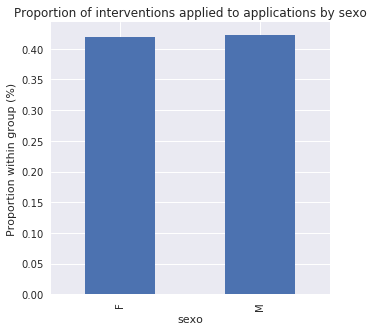

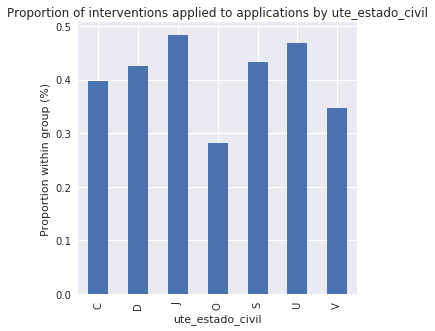

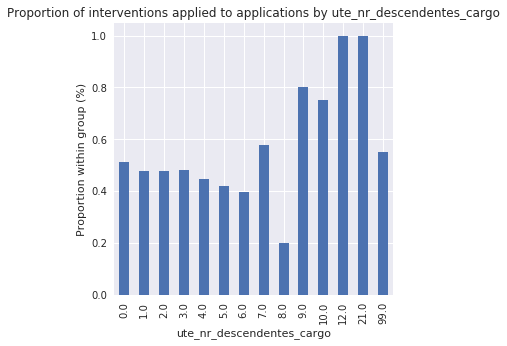

In [49]:
#Who were the people who had/hadn't interventions?
#Variables to look at: sexo, dhabilitacao_escolar, dcategoria, ute_estado_civil, sub_rsi, ute_idade, ute_nr_descendentes_cargo

def get_proportions_bar_chart(dataframe, variable):
    interv_by_var = dataframe.groupby([variable,'had_interv'])[['ute_id_x']].count()
    interv_by_var = (interv_by_var / interv_by_var.groupby(level=0).sum()).reset_index()
    interv_by_var = interv_by_var[interv_by_var['had_interv']]
    
    plt.figure()
    return interv_by_var.plot(
        x=variable,
        y='ute_id_x',
        kind='bar',
        legend=False,
        figsize=(5,5),
        title="Proportion of interventions applied to applications by " + 
        variable).set_ylabel('Proportion within group (%)')


demographic_variables = ['sexo', 'ute_estado_civil','ute_nr_descendentes_cargo']

for variable in demographic_variables:
    get_proportions_bar_chart(utes_interv,variable)    

In [2]:
utes_interv['dhabilitacao_escolar'].unique()

years_of_education = pd.DataFrame(data={'dhabilitacao_escolar':['N\xc3\x83O SABE LER/ESCREVER', 'LER-ESCREVER S/GRAU ENSINO', '4 ANOS', '6 ANOS', '9 ANOS', '11 ANOS', '12 ANOS', 'ENSINO P\xc3\x93S-SECUND\xc3\x81RIO', 'LICENCIATURA', 'BACHARELATO', 'MESTRADO', 'DOUTORAMENTO'], 'education_level':['ILLITERATE','VERY LOW','LOW','LOW','LOW','BASIC','BASIC','TECHNICAL','ACADEMIC','ACADEMIC','ACADEMIC','ACADEMIC']})
years_of_education

utes_interv = pd.merge(utes_interv,years_of_education)

NameError: name 'utes_interv' is not defined

In [82]:
#Which types of unemployed groups were most likely to receive which types of interventions in the past?

demographic_variables2 = ['dhabilitacao_escolar', 'dcategoria', 'sub_rsi', 'ute_idade']

utes_interv

,index_x,application_id,ute_id_x,had_interv,index_y,anomes,ctipo_movimento,dtipo_movimento,ute_id_y,sexo,...,ute_idade,conjuge_estado_civil,conjuge_categoria,conjuge_estado,conjuge_motivo_indisponibilidade,candidatura_categoria_anterior,candidatura_estado_anterior,ute_nr_pessoas_cargo,ute_nr_descendentes_cargo,candidatura_data_ppe
1,1,0,710,True,120684,201612,11,PEDIDOS DE EMPREGO AO LONGO DO MÃS,710,M,...,44,None,None,None,None,2.0,PAS,2.0,2.0,2011-07-19 00:00:00
2,2,1,818,True,70861,201302,11,PEDIDOS DE EMPREGO AO LONGO DO MÃS,818,F,...,50,None,None,None,None,None,None,2.0,2.0,None
3,3,2,820,True,22631,200903,11,PEDIDOS DE EMPREGO AO LONGO DO MÃS,820,F,...,39,None,None,None,None,None,None,2.0,NaN,None
4,4,3,820,True,61039,201205,11,PEDIDOS DE EMPREGO AO LONGO DO MÃS,820,F,...,42,None,None,None,None,3.0,PAS,2.0,2.0,None
5,5,4,832,True,1939,200703,11,PEDIDOS DE EMPREGO AO LONGO DO MÃS,832,M,...,32,None,None,None,None,None,None,1.0,NaN,None
6,6,5,832,False,9205,200712,11,PEDIDOS DE EMPREGO AO LONGO DO MÃS,832,M,...,33,None,None,None,None,None,None,1.0,NaN,None
7,7,6,836,True,8494,200711,11,PEDIDOS DE EMPREGO AO LONGO DO MÃS,836,F,...,32,None,None,None,None,None,None,0.0,NaN,None
8,8,7,836,False,45705,201102,11,PEDIDOS DE EMPREGO AO LONGO DO MÃS,836,F,...,35,None,None,None,None,None,None,0.0,NaN,None
9,9,8,836,True,50142,201107,11,PEDIDOS DE EMPREGO AO LONGO DO MÃS,836,F,...,36,None,None,None,None,None,None,0.0,NaN,None
10,10,9,836,True,109089,201601,11,PEDIDOS DE EMPREGO AO LONGO DO MÃS,836,F,...,40,None,None,None,None,2.0,PAS,0.0,0.0,2011-02-15 00:00:00


In [52]:
#Filter only interventions data
interventions = movements[movements['movement_type']=='intervention']

In [53]:
interventions.head(5)

,ute_id,date,application_id,movement_type,movement_subtype,movement_result,movement_index
12,710,201704,120674,intervention,EFA - S3 - TIPO A,,127922
23,818,201410,70845,intervention,FORMAÃÃO - VIDA ATIVA,,90776
25,818,201502,70845,intervention,CONTRATO EMPREGO-INSERÃÃO,,98633
29,820,200904,22603,intervention,BOLSA FORMAÃÃO INICIATIVA TRABALHADOR,,11140
30,820,200912,22603,intervention,APRENDIZAGEM,,15156


In [54]:
#Top-10 popular interventions
top10interv = interventions.groupby('movement_subtype').size().nlargest(10).to_frame(name='count').reset_index(level=0)
top10interv['count'] = top10interv['count']/top10interv['count'].sum()
top10interv

,movement_subtype,count
0,FORMAÃÃO - VIDA ATIVA,0.439802
1,FORMAÃÃO CONTÃNUA - FORMAÃÃO MODULAR,0.244506
2,APRENDIZAGEM,0.046352
3,INSCRIÃÃO CNO,0.045539
4,FORMAÃÃO - ENTIDADES EXTERNAS,0.043667
5,EFA - S3 - TIPO A,0.042137
6,CONTRATO EMPREGO-INSERÃÃO,0.040970
7,EFA - FORMAÃÃO CONTINUA - TIPO B3,0.038713
8,FORMAÃÃO EM COMPETENCIAS BÃSICAS,0.033213
9,"FORMAÃÃO CONTINUA - RECICLAGEM, ACTUALIZAÃÃ...",0.025102


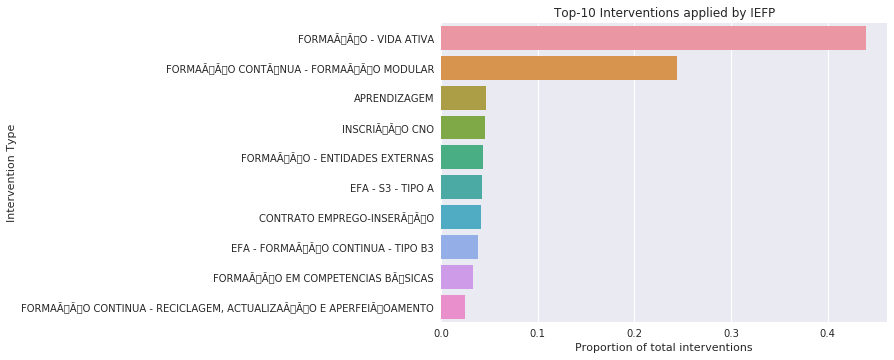

In [36]:
sns.barplot(x='count',y='movement_subtype', data=top10interv)
sns.plt.title('Top-10 Interventions applied by IEFP')
sns.plt.xlabel('Proportion of total interventions')
sns.plt.ylabel('Intervention Type')

In [ ]:
#Did the people who got interventions get jobs?
#Did the people who did not get interventions get jobs?